In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint

from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from auxiliar_func import *
from plot_func import *

In [7]:
target = 'income_50k'
df_tr = pd.read_csv('../train.csv')

prep_par, model_par = get_best_params('./results/results_catboost.csv')
pprint(prep_par)
pprint({k: model_par[k] for k in model_par if k != 'cat_features'})

{'cat_age': False,
 'downsampling_method': 'random',
 'generate_dummies': False,
 'imputation': 'mode',
 'merge_capital': False,
 'remove_duplicates': True,
 'remove_outliers': False,
 'scaling': None,
 'target_freq': 0.85}
{'border_count': 64,
 'depth': 6,
 'eval_metric': 'F1',
 'iterations': 750,
 'loss_function': 'Logloss',
 'random_seed': 42,
 'verbose': 0}


## Metrics of the final catboost model

In [8]:
df_tr_pre = preprocessing(df_tr, **prep_par)
X_train, y_train = df_tr_pre.drop(target, axis=1), df_tr_pre[target]

cat_model = CatBoostClassifier(**model_par)
cat_model.fit(X_train, y_train)

In [9]:
df_te = pd.read_csv('../test.csv')

prep_par_te = prep_par.copy()
prep_par_te['downsampling_method'] = None

df_te_pre = preprocessing(df_te, **prep_par_te)

# we have the same number of rows in the test set
assert df_te_pre.shape[0] == df_te.shape[0]

# show the final metrics for the test set
df_te_pre = preprocessing(df_te, **prep_par)


AssertionError: 

## Feature importance of the final model

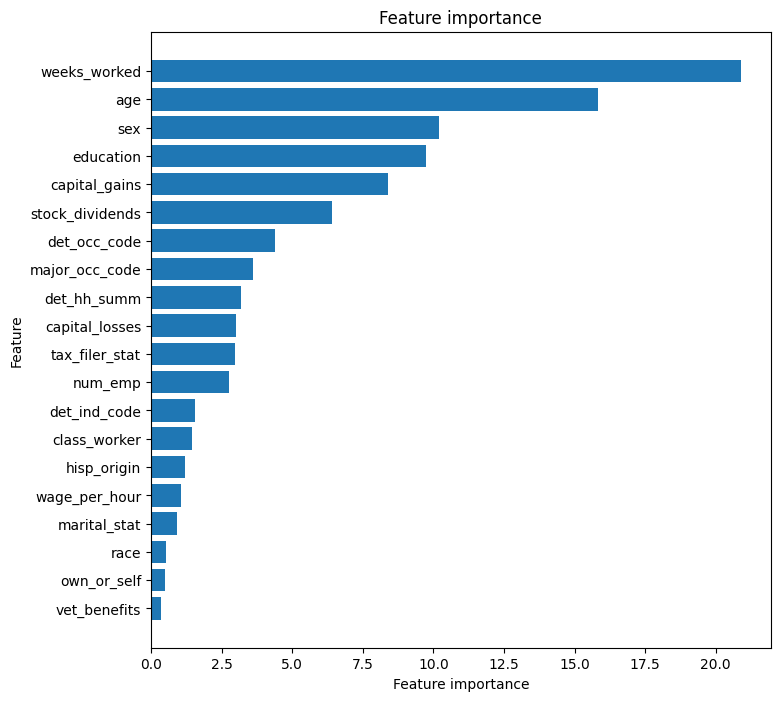

In [ ]:
def plot_feature_importance(model, X, n_features=20):
    """
    Plot the feature importance of a given model
    :param model: the model to be used
    :param X: the training data
    :param n_features: the number of features to plot
    :return: None
    """
    feature_importance = model.get_feature_importance()
    feature_names = X.columns
    sorted_idx = np.argsort(feature_importance)

    plt.figure(figsize=(8, 8))
    plt.barh(range(n_features), feature_importance[sorted_idx[-n_features:]], align='center')
    plt.yticks(np.arange(n_features), [feature_names[i] for i in sorted_idx[-n_features:]])
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
    plt.title('Feature importance')
    plt.show()

# plot the feature importance
plot_feature_importance(cat_model, X_train, 20)

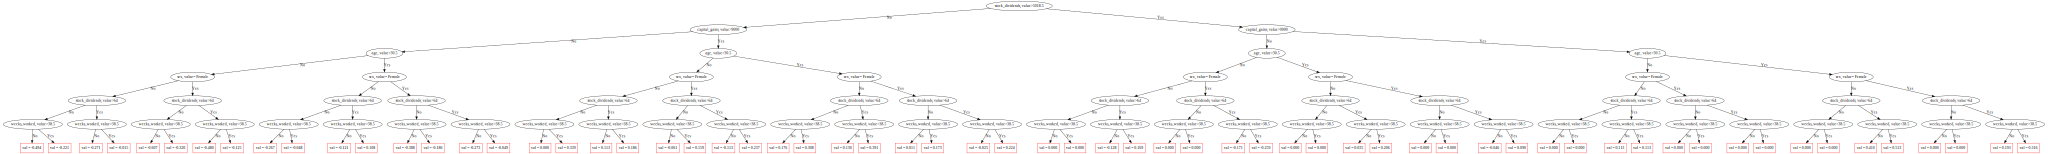

In [ ]:
# pool = Pool(X_train, y_train, cat_features=cat_features)

# cat_model.plot_tree(
#     tree_idx=0,
#     pool=pool
# )